<a href="https://colab.research.google.com/github/MorarStefan/SentimentAnalysis/blob/master/Sentiment_analysis_(Final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

dataset_url = 'https://raw.githubusercontent.com/MorarStefan/SentimentAnalysis/master/Airline-Dataset.csv'
df = pd.read_csv(dataset_url)

In [2]:
# Check import 
data_top = df.head()
data_top

,Unnamed: 0,airline_name,author,author_country,content,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,Month,Year,recommended
0,0,adria-airways,D Ito,Germany,Outbound flight FRA/PRN A319. 2 hours 10 min f...,Economy,7.0,4.0,4.0,4.0,0.0,4.0,4,2015,1
1,1,adria-airways,Ron Kuhlmann,United States,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,Business Class,10.0,4.0,5.0,4.0,1.0,5.0,1,2015,1
2,2,adria-airways,E Albin,Switzerland,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,Economy,9.0,5.0,5.0,4.0,0.0,5.0,9,2014,1
3,3,adria-airways,Tercon Bojan,Singapore,Adria serves this 100 min flight from Ljubljan...,Business Class,8.0,4.0,4.0,3.0,1.0,4.0,9,2014,1
4,4,adria-airways,L James,Poland,WAW-SKJ Economy. No free snacks or drinks on t...,Economy,4.0,4.0,2.0,1.0,2.0,2.0,6,2014,0


In [0]:
# Split the dataset into training and testing datasets

import numpy as np

train_ds, test_ds = np.array_split(df, 2)

In [4]:
print("Size of train-set: ", len(train_ds))
print("Size of test-set:  ", len(test_ds))

Size of train-set:  13642
Size of test-set:   13642


In [0]:
# Convert data frames object to Numpy arrays 

train_ds = np.array(train_ds)
test_ds = np.array(test_ds)

In [6]:
# Review example (the review column is the 5th column -index 4: "content")

train_ds[0][4]

"Outbound flight FRA/PRN A319. 2 hours 10 min flight. I thought drinks/snacks for sale but sandwich soft drinks were served complimentary. Inbound flights SKP/LJU/FRA CRJ900. each 1 hour 30 min flight. Skyshop menu was in a seat pocket and drinks/snacks were for sale. All flight crews were friendly. Security check at the Ljubljana airport for transit passengers was chaos however it's possible to go to a gate within 30min."

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer

number_of_words = 100000
tokenizer = Tokenizer(num_words=number_of_words, oov_token="<OOV>")
tokenizer.fit_on_texts(train_ds[:, 4])

In [8]:
tokenizer.word_index

{'<OOV>': 1,
 'the': 2,
 'and': 3,
 'to': 4,
 'was': 5,
 'a': 6,
 'on': 7,
 'i': 8,
 'in': 9,
 'flight': 10,
 'of': 11,
 'for': 12,
 'with': 13,
 'were': 14,
 'we': 15,
 'not': 16,
 'is': 17,
 'but': 18,
 'it': 19,
 'from': 20,
 'very': 21,
 'at': 22,
 'that': 23,
 'my': 24,
 'had': 25,
 'as': 26,
 'they': 27,
 'this': 28,
 'service': 29,
 'have': 30,
 'no': 31,
 'food': 32,
 'good': 33,
 'time': 34,
 'seats': 35,
 'seat': 36,
 'all': 37,
 'you': 38,
 'be': 39,
 'an': 40,
 'are': 41,
 'flights': 42,
 'crew': 43,
 'class': 44,
 'staff': 45,
 'so': 46,
 'our': 47,
 'there': 48,
 'would': 49,
 'only': 50,
 'cabin': 51,
 'air': 52,
 'business': 53,
 'which': 54,
 'one': 55,
 'again': 56,
 'plane': 57,
 'or': 58,
 'return': 59,
 'by': 60,
 'me': 61,
 'when': 62,
 'their': 63,
 'airline': 64,
 'entertainment': 65,
 'check': 66,
 'economy': 67,
 'out': 68,
 'flew': 69,
 'first': 70,
 'us': 71,
 'back': 72,
 'if': 73,
 'hours': 74,
 'more': 75,
 'than': 76,
 'fly': 77,
 '2': 78,
 'get': 79,
 '

In [0]:
import tensorflow as tf

def convert_overall_rating(rating):
  return tf.where(rating >= 6, 1, 0)

def convert_individual_rating(rating):
  return tf.where(rating >= 3, 1, 0)

In [0]:
# Convert the ratings to 0 or 1

for i in range(len(train_ds)):
  train_ds[i][6] = convert_overall_rating(train_ds[i][6])
  train_ds[i][7] = convert_individual_rating(train_ds[i][7])
  train_ds[i][8] = convert_individual_rating(train_ds[i][8])
  train_ds[i][9] = convert_individual_rating(train_ds[i][9])
  train_ds[i][10] = convert_individual_rating(train_ds[i][10])
  train_ds[i][11] = convert_individual_rating(train_ds[i][11])

for i in range(len(test_ds)):
  test_ds[i][6] = convert_overall_rating(test_ds[i][6])
  test_ds[i][7] = convert_individual_rating(test_ds[i][7])
  test_ds[i][8] = convert_individual_rating(test_ds[i][8])
  test_ds[i][9] = convert_individual_rating(test_ds[i][9])
  test_ds[i][10] = convert_individual_rating(test_ds[i][10])
  test_ds[i][11] = convert_individual_rating(test_ds[i][11])

In [11]:
# Test conversion 

print(train_ds[0][7])
print(test_ds[100][8])

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


In [12]:
train_ds[:,7]

array([<tf.Tensor: shape=(), dtype=int32, numpy=1>,
       <tf.Tensor: shape=(), dtype=int32, numpy=1>,
       <tf.Tensor: shape=(), dtype=int32, numpy=1>, ...,
       <tf.Tensor: shape=(), dtype=int32, numpy=1>,
       <tf.Tensor: shape=(), dtype=int32, numpy=0>,
       <tf.Tensor: shape=(), dtype=int32, numpy=1>], dtype=object)

In [0]:
# Convert text to the tokens defined previously

train_sequences = tokenizer.texts_to_sequences(train_ds[:, 4])

In [14]:
# Test conversion to tokens for the first review

print(train_ds[0, 4])
print(train_sequences[0])

# For example, we can check the word "flight".

Outbound flight FRA/PRN A319. 2 hours 10 min flight. I thought drinks/snacks for sale but sandwich soft drinks were served complimentary. Inbound flights SKP/LJU/FRA CRJ900. each 1 hour 30 min flight. Skyshop menu was in a seat pocket and drinks/snacks were for sale. All flight crews were friendly. Security check at the Ljubljana airport for transit passengers was chaos however it's possible to go to a gate within 30min.
[372, 10, 728, 14084, 834, 78, 74, 194, 687, 10, 8, 572, 113, 345, 12, 2067, 18, 609, 857, 113, 14, 120, 914, 908, 42, 9317, 4802, 728, 4803, 322, 142, 88, 230, 687, 10, 9318, 509, 5, 9, 6, 36, 1646, 3, 113, 345, 14, 12, 2067, 37, 10, 724, 14, 93, 382, 66, 22, 2, 4485, 94, 12, 591, 87, 5, 1492, 144, 294, 701, 4, 210, 4, 6, 165, 805, 3808]


In [15]:
# Test on words that might not be in the vocabulary: nightmarish, abysmal

quick_test_data = ['The flight was nightmarish and abysmal', 
             'Wonderful experience.']
quick_test_sequences = tokenizer.texts_to_sequences(quick_test_data)

print(quick_test_sequences)

[[2, 10, 5, 11032, 3, 2949], [850, 90]]


In [16]:
# Because the previous words are in the vocabulary, I will write non-words to see if OOV (Out of vocabulary), which has code 1, is assigned to it

quick_test_data2 = ['The flight was alalala', 
                    'Seats were baaaad']
quick_test_sequences2 = tokenizer.texts_to_sequences(quick_test_data2)

print(quick_test_sequences2)

[[2, 10, 5, 1], [35, 14, 1]]


In [0]:
# The sequences are of variable length now, but we need them to have the same size.
# We could pad all the sequences with 0's in order to have the length of the longest sequence, but this is inefficient.

size_of_train_sequences = []
for sequence in train_sequences:
  size_of_train_sequences.append(len(sequence))

In [18]:
size_of_train_sequences[0]

74

In [0]:
max_size = np.max(size_of_train_sequences)
mean_size = np.mean(size_of_train_sequences)
standard_deviation = np.std(size_of_train_sequences)

In [20]:
# Largest sequence
print(max_size)
# Mean size of the sequences
print(mean_size)
# STD
print(standard_deviation)

649
122.86277671895617
77.76595084505493


In [0]:
# Add standard deviation 2.5 times
sequence_limit = mean_size + standard_deviation * 5 / 2

In [22]:
# 97.20 % of sequences are covered. 97.20 % of sequences will be padded, while 2.80 % will be truncated.

np.sum(size_of_train_sequences < sequence_limit) / len(size_of_train_sequences)

0.9720715437619117

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

sequence_limit = int(sequence_limit)
padded_train_sequences = pad_sequences(train_sequences, maxlen = sequence_limit, padding = 'post', truncating = 'post')

In [24]:
print(padded_train_sequences.shape)

(13642, 317)


In [25]:
# Test padding

print(train_sequences[0])
print(padded_train_sequences[0])

[372, 10, 728, 14084, 834, 78, 74, 194, 687, 10, 8, 572, 113, 345, 12, 2067, 18, 609, 857, 113, 14, 120, 914, 908, 42, 9317, 4802, 728, 4803, 322, 142, 88, 230, 687, 10, 9318, 509, 5, 9, 6, 36, 1646, 3, 113, 345, 14, 12, 2067, 37, 10, 724, 14, 93, 382, 66, 22, 2, 4485, 94, 12, 591, 87, 5, 1492, 144, 294, 701, 4, 210, 4, 6, 165, 805, 3808]
[  372    10   728 14084   834    78    74   194   687    10     8   572
   113   345    12  2067    18   609   857   113    14   120   914   908
    42  9317  4802   728  4803   322   142    88   230   687    10  9318
   509     5     9     6    36  1646     3   113   345    14    12  2067
    37    10   724    14    93   382    66    22     2  4485    94    12
   591    87     5  1492   144   294   701     4   210     4     6   165
   805  3808     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
  

In [0]:
# Apply the previous steps for the test dataset too

test_sequences = tokenizer.texts_to_sequences(test_ds[:, 4])
padded_test_sequences = pad_sequences(test_sequences, maxlen = sequence_limit, padding = 'post', truncating = 'post')

In [0]:
train_overall_label = np.asarray(train_ds[:, 6]).astype(np.float32)
test_overall_label = np.asarray(test_ds[:, 6]).astype(np.float32)

train_seat_comfort_label = np.asarray(train_ds[:, 7]).astype(np.float32)
test_seat_comfort_label = np.asarray(test_ds[:, 7]).astype(np.float32)

train_cabin_staff_label = np.asarray(train_ds[:, 8]).astype(np.float32)
test_cabin_staff_label = np.asarray(test_ds[:, 8]).astype(np.float32)

train_food_beverages_label = np.asarray(train_ds[:, 9]).astype(np.float32)
test_food_beverages_label = np.asarray(test_ds[:, 9]).astype(np.float32)

train_inflight_entertainment_label = np.asarray(train_ds[:, 10]).astype(np.float32)
test_inflight_entertainment_label = np.asarray(test_ds[:, 10]).astype(np.float32)

train_value_money_label = np.asarray(train_ds[:, 11]).astype(np.float32)
test_value_money_label = np.asarray(test_ds[:, 11]).astype(np.float32)

In [28]:
# Creating the RNN

from tensorflow import keras
from tensorflow.keras import layers

embedding_size = 8

input_1 = layers.Input(shape=(sequence_limit,))
embedding_layer = layers.Embedding(input_dim = number_of_words, output_dim = embedding_size, input_length = sequence_limit)(input_1)

pooling_layer1 = layers.GlobalAveragePooling1D()(embedding_layer)
pooling_layer2 = layers.GlobalAveragePooling1D()(embedding_layer)
pooling_layer3 = layers.GlobalAveragePooling1D()(embedding_layer)
pooling_layer4 = layers.GlobalAveragePooling1D()(embedding_layer)
pooling_layer5 = layers.GlobalAveragePooling1D()(embedding_layer)
pooling_layer6 = layers.GlobalAveragePooling1D()(embedding_layer)

dense_layer1 = layers.Dense(units = 8, activation = 'relu')(pooling_layer1)
dense_layer2 = layers.Dense(units = 8, activation = 'relu')(pooling_layer2)
dense_layer3 = layers.Dense(units = 8, activation = 'relu')(pooling_layer3)
dense_layer4 = layers.Dense(units = 12, activation = 'relu')(pooling_layer4)
dense_layer5 = layers.Dense(units = 16, activation = 'relu')(pooling_layer5)
dense_layer6 = layers.Dense(units = 8, activation = 'relu')(pooling_layer6)

output1 = layers.Dense(1, activation='sigmoid')(dense_layer1)
output2 = layers.Dense(1, activation='sigmoid')(dense_layer2)
output3 = layers.Dense(1, activation='sigmoid')(dense_layer3)
output4 = layers.Dense(1, activation='sigmoid')(dense_layer4)
output5 = layers.Dense(1, activation='sigmoid')(dense_layer5)
output6 = layers.Dense(1, activation='sigmoid')(dense_layer6)

model = keras.models.Model(inputs=input_1, outputs=[output1, output2, output3, output4, output5, output6])
model.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(lr=1e-3), metrics = ['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 317)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 317, 8)       800000      input_1[0][0]                    
__________________________________________________________________________________________________
global_average_pooling1d (Globa (None, 8)            0           embedding[0][0]                  
__________________________________________________________________________________________________
global_average_pooling1d_1 (Glo (None, 8)            0           embedding[0][0]                  
______________________________________________________________________________________________

In [29]:
no_of_epochs = 15
batch_size = 16

history = model.fit(x=padded_train_sequences, 
                    y=[train_overall_label, train_seat_comfort_label, train_cabin_staff_label, 
                       train_food_beverages_label, train_inflight_entertainment_label, train_value_money_label], 
                    epochs = no_of_epochs, batch_size = batch_size, verbose=1, validation_split=0.2)

Epoch 1/15
683/683 [==============================] - 11s 16ms/step - loss: 3.7290 - dense_6_loss: 0.6400 - dense_7_loss: 0.5978 - dense_8_loss: 0.5863 - dense_9_loss: 0.6326 - dense_10_loss: 0.6852 - dense_11_loss: 0.5871 - dense_6_accuracy: 0.6260 - dense_7_accuracy: 0.7036 - dense_8_accuracy: 0.7251 - dense_9_accuracy: 0.6436 - dense_10_accuracy: 0.5511 - dense_11_accuracy: 0.7121 - val_loss: 3.3977 - val_dense_6_loss: 0.5844 - val_dense_7_loss: 0.5252 - val_dense_8_loss: 0.4999 - val_dense_9_loss: 0.6040 - val_dense_10_loss: 0.6628 - val_dense_11_loss: 0.5214 - val_dense_6_accuracy: 0.6797 - val_dense_7_accuracy: 0.7615 - val_dense_8_accuracy: 0.7699 - val_dense_9_accuracy: 0.6724 - val_dense_10_accuracy: 0.6277 - val_dense_11_accuracy: 0.7519
Epoch 2/15
683/683 [==============================] - 10s 15ms/step - loss: 3.1664 - dense_6_loss: 0.5000 - dense_7_loss: 0.5193 - dense_8_loss: 0.4817 - dense_9_loss: 0.5562 - dense_10_loss: 0.6284 - dense_11_loss: 0.4808 - dense_6_accuracy:

In [30]:
score = model.evaluate(x=padded_test_sequences, y=[test_overall_label, test_seat_comfort_label, test_cabin_staff_label,
                                                   test_food_beverages_label, test_inflight_entertainment_label, test_value_money_label], 
                       verbose=1)

427/427 [==============================] - 2s 5ms/step - loss: 2.4911 - dense_6_loss: 0.3061 - dense_7_loss: 0.4027 - dense_8_loss: 0.3529 - dense_9_loss: 0.4859 - dense_10_loss: 0.5784 - dense_11_loss: 0.3651 - dense_6_accuracy: 0.8809 - dense_7_accuracy: 0.8134 - dense_8_accuracy: 0.8430 - dense_9_accuracy: 0.7788 - dense_10_accuracy: 0.7202 - dense_11_accuracy: 0.8414


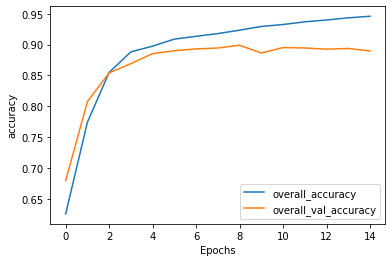

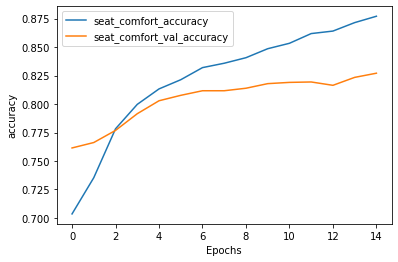

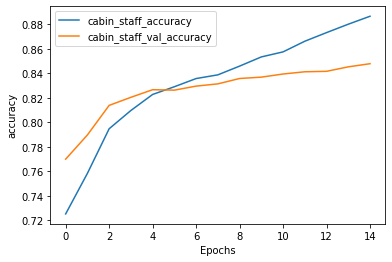

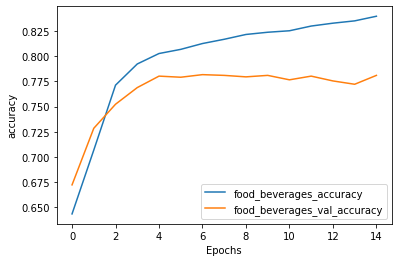

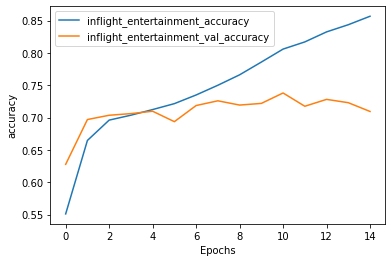

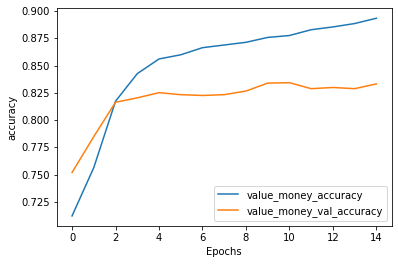

In [31]:
import matplotlib.pyplot as plot

plot.plot(history.history['dense_6_accuracy'])
plot.plot(history.history['val_dense_6_accuracy'])
plot.xlabel('Epochs')
plot.ylabel('accuracy')
plot.legend(['overall_accuracy', 'overall_val_accuracy'])
plot.show()

plot.plot(history.history['dense_7_accuracy'])
plot.plot(history.history['val_dense_7_accuracy'])
plot.xlabel('Epochs')
plot.ylabel('accuracy')
plot.legend(['seat_comfort_accuracy', 'seat_comfort_val_accuracy'])
plot.show()

plot.plot(history.history['dense_8_accuracy'])
plot.plot(history.history['val_dense_8_accuracy'])
plot.xlabel('Epochs')
plot.ylabel('accuracy')
plot.legend(['cabin_staff_accuracy', 'cabin_staff_val_accuracy'])
plot.show()

plot.plot(history.history['dense_9_accuracy'])
plot.plot(history.history['val_dense_9_accuracy'])
plot.xlabel('Epochs')
plot.ylabel('accuracy')
plot.legend(['food_beverages_accuracy', 'food_beverages_val_accuracy'])
plot.show()

plot.plot(history.history['dense_10_accuracy'])
plot.plot(history.history['val_dense_10_accuracy'])
plot.xlabel('Epochs')
plot.ylabel('accuracy')
plot.legend(['inflight_entertainment_accuracy', 'inflight_entertainment_val_accuracy'])
plot.show()

plot.plot(history.history['dense_11_accuracy'])
plot.plot(history.history['val_dense_11_accuracy'])
plot.xlabel('Epochs')
plot.ylabel('accuracy')
plot.legend(['value_money_accuracy', 'value_money_val_accuracy'])
plot.show()